## EWMA (Exponentially Weighted Moving Average)

In [16]:
from pathlib import Path

import pandas as pd

In [2]:
directory = Path.cwd().parent / 'Files' / 'Time_Series'
airline = pd.read_csv(directory / 'airline_passengers.csv', index_col='Month')

In [3]:
airline[airline['Thousands of Passengers'].isnull()]

,Thousands of Passengers
Month,
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60,NaN


In [4]:
airline.dropna(inplace=True)
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


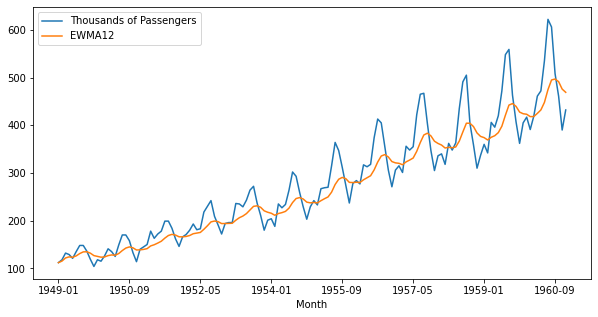

In [7]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers', 'EWMA12']].plot(figsize=(10, 5));

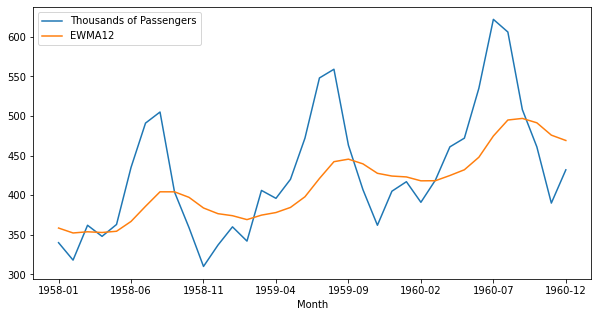

In [9]:
airline[['Thousands of Passengers', 'EWMA12']]['1958-01':].plot(figsize=(10, 5));

## SMA (Simple Moving Average)

In [10]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [11]:
airline.head()

,Thousands of Passengers,EWMA12,6-month-SMA,12-month-SMA
Month,,,,
1949-01,112.0,112.000000,NaN,NaN
1949-02,118.0,115.250000,NaN,NaN
1949-03,132.0,121.787529,NaN,NaN
1949-04,129.0,124.064224,NaN,NaN
1949-05,121.0,123.231685,NaN,NaN


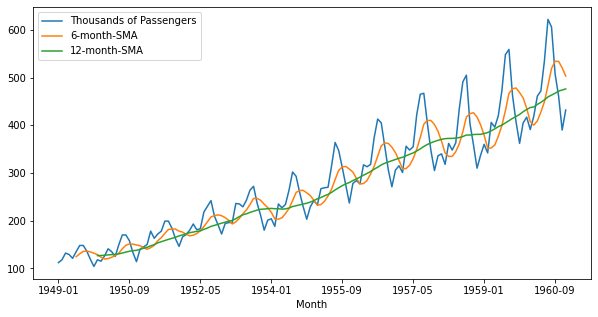

In [14]:
airline[['Thousands of Passengers', '6-month-SMA', '12-month-SMA']].plot(figsize=(10, 5));

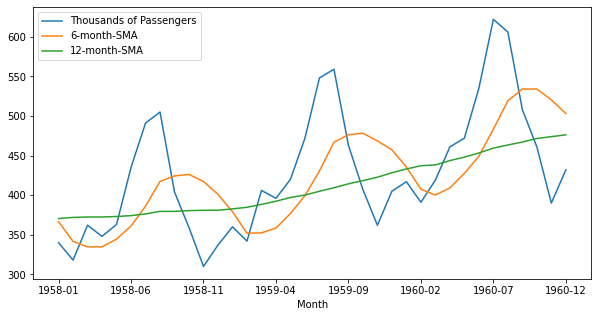

In [15]:
airline[['Thousands of Passengers', '6-month-SMA', '12-month-SMA']]['1958-01':].plot(figsize=(10, 5));